In [ ]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
SIZE_X = SIZE_Y = 224
batch_size=64
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS',
    labels='inferred',
    label_mode = "categorical",
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(SIZE_X,SIZE_Y),
    seed=123,
    validation_split=0.2,
    subset='training',
)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS',
    labels='inferred',
    label_mode = "categorical",
    color_mode='rgb',
    batch_size= batch_size,
    image_size=(SIZE_X,SIZE_Y),
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 1676 files belonging to 4 classes.
Using 1341 files for training.
Found 1676 files belonging to 4 classes.
Using 335 files for validation.


In [ ]:
def augment(x,y):
  image = tf.image.random_brightness(x, max_delta=0.05)
  return image,y

ds_train = ds_train.map(augment)

In [ ]:
basemodel = VGG19(weights="imagenet", include_top=False,input_shape=(224,224,3))

In [ ]:
basemodel.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
startmodel=basemodel.output
startmodel=Flatten(name='flatten')(startmodel)
startmodel=Dense(128,activation='relu')(startmodel)
startmodel=Dense(4,activation="softmax")(startmodel)
model = Model(inputs=basemodel.input, outputs=startmodel)

In [ ]:
for layer in basemodel.layers:
    layer.trainable = False
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3140944661893861540
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14100607419681021927
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit_generator(ds_train,
validation_data = (ds_validation), 
epochs = 3
, verbose = 1,
callbacks=[es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/3
20/20 [==============================] - 77s 3s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/3
20/20 [==============================] - 74s 3s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 00002: early stopping


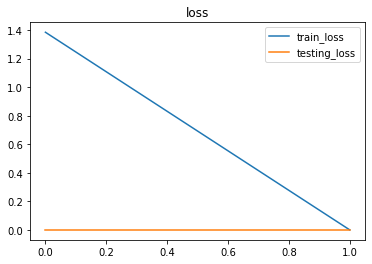

In [ ]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

In [ ]:
result = model.evaluate(ds_validation,batch_size=128)
print("test_loss, test accuracy",result)

3/3 [==============================] - 8s 491ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
test_loss, test accuracy [0.0, 1.0]


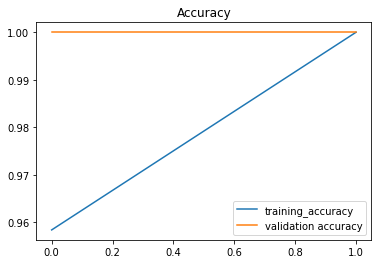

In [ ]:
plt.plot(history.history['categorical_accuracy'], label='training_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

Input image shape: (1, 224, 224, 3)


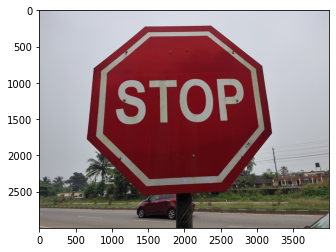

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img_path = '/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/STOP/IMG_20211112_111509_Burst03.jpg'

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
print(model.predict(x))

[[0. 1. 0. 0.]]


Input image shape: (1, 224, 224, 3)


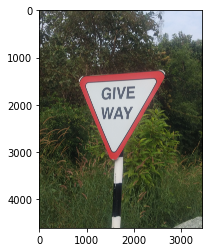

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img_path = '/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/YIELD/IMG_20211109_095706_Burst06.jpg'

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
print(model.predict(x))

[[0. 0. 0. 1.]]


Input image shape: (1, 224, 224, 3)


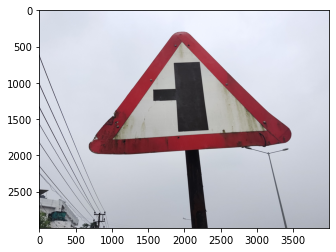

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img_path = '/content/drive/MyDrive/SIGNS.zip (Unzipped Files)/SIGNS/WARNING/IMG_20211112_110449_Burst08.jpg'

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
print(model.predict(x))

[[0. 0. 1. 0.]]
